# Ford GoBike Dataset; Explanatory Analysis



## Reading Master File

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline

In [11]:
## reading data
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour,day,month,year,weekday
0,0,0,80110,16:57:39.654000,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,...,-122.415929,96,Customer,1335.0,2020-05-20,16,20,5,2020,Wednesday
1,1,1,78800,15:56:34.842000,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,...,-122.426614,88,Customer,1313.0,2020-05-20,15,20,5,2020,Wednesday
2,2,2,45768,22:45:48.411000,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,...,-122.267764,1094,Customer,763.0,2020-05-20,22,20,5,2020,Wednesday
3,3,3,62172,17:31:10.636000,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,...,-122.408445,2831,Customer,1036.0,2020-05-20,17,20,5,2020,Wednesday
4,4,4,43603,14:23:14.001000,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,...,-122.265896,3167,Subscriber,727.0,2020-05-20,14,20,5,2020,Wednesday


In [12]:
# checking the file  
df.shape[0]

519700

In [13]:

df['start_date'] = pd.to_datetime(df['start_date'],errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'],errors='coerce')

In [14]:
#load info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 22 columns):
Unnamed: 0                 519700 non-null int64
Unnamed: 0.1               519700 non-null int64
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
duration_min               519700 non-null float64
start_date                 519700 non-null datetime64[ns]
start_hour              

## Insights

 What is the trips trend over the past two years?

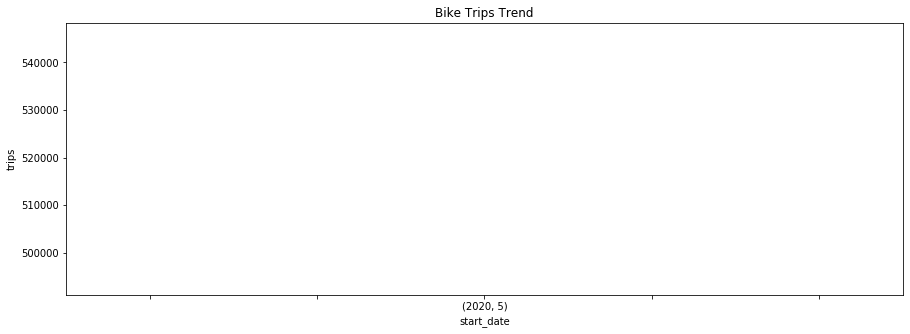

In [15]:
# plotting trend of bike trips since 2018 till now
group_by_date = df.groupby([df["start_date"].dt.year, df["start_date"].dt.month]).count()

group_by_date['bike_id'].plot(kind='line' ,figsize = (15,5) )

plt.xlabel('start_date')
plt.ylabel('trips')
plt.title('Bike Trips Trend')
plt.show()


 Does this trend differs between different user types?

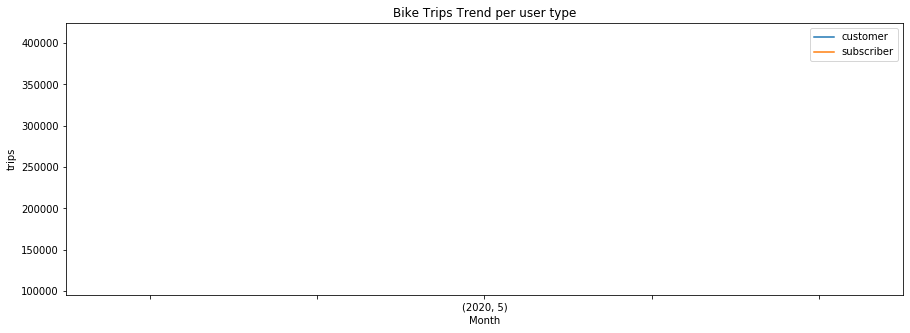

In [16]:
#trips for both customers and subscriber separately 
customer = df[df['user_type'] == 'Customer']
subscriber = df[df['user_type'] == 'Subscriber']

group_by_date_cust = customer.groupby([customer["start_date"].dt.year, customer["start_date"].dt.month]).count()
group_by_date_sub = subscriber.groupby([subscriber["start_date"].dt.year, subscriber["start_date"].dt.month]).count()

group_by_date_cust['bike_id'].plot(kind='line' ,figsize = (15,5) )
group_by_date_sub['bike_id'].plot(kind='line' ,figsize = (15,5) )

plt.xlabel('Month')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Bike Trips Trend per user type')
plt.show()


 What is the percentage share of each user type?

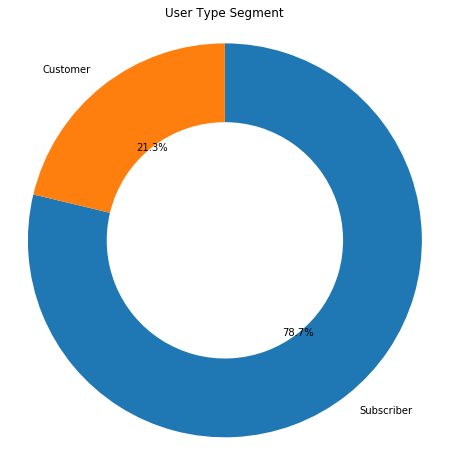

In [21]:
# percentage of customers and subscribers out of total
plt.figure(figsize = [15, 8])
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("User Type Segment")
plt.axis('square');

#### 78% of the users are subscribers, this explain why the average trend looks like the trend of the subscribers

 What is the trend of bike rides over weekday?

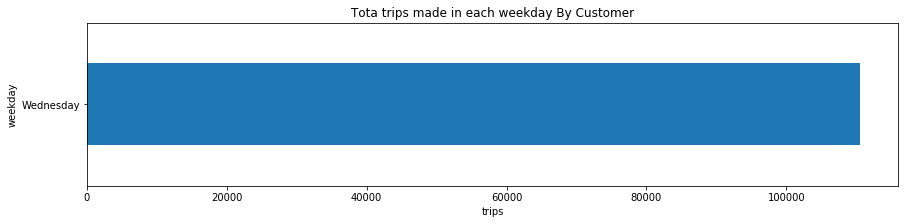

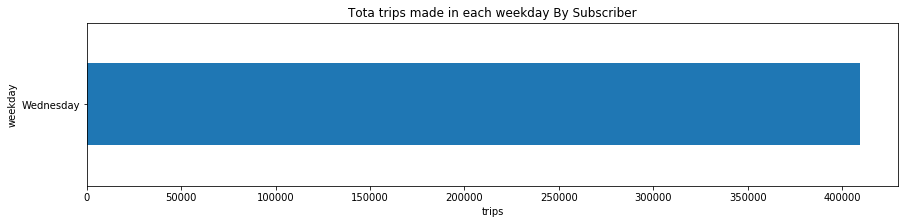

In [18]:
## activity on weekday per user type


group_by_day_cust = customer.groupby('weekday').count()
group_by_day_sub = subscriber.groupby('weekday').count()

plt.subplot(1, 2, 1)
group_by_day_cust['bike_id'].plot(kind='barh' , figsize = (32,3))
plt.xlabel('trips')
plt.ylabel('weekday')
plt.title('Tota trips made in each weekday By Customer')
plt.show()

plt.subplot(1, 2, 2)
group_by_day_sub['bike_id'].plot(kind='barh' , figsize = (32,3) )
plt.xlabel('trips')
plt.ylabel('weekday')
plt.title('Tota trips made in each weekday By Subscriber')
plt.show()


#### Customers have uniform usage trends over the week, While subscribers usually has less activity during weekends

 What are the peak hours of usage for each user type?

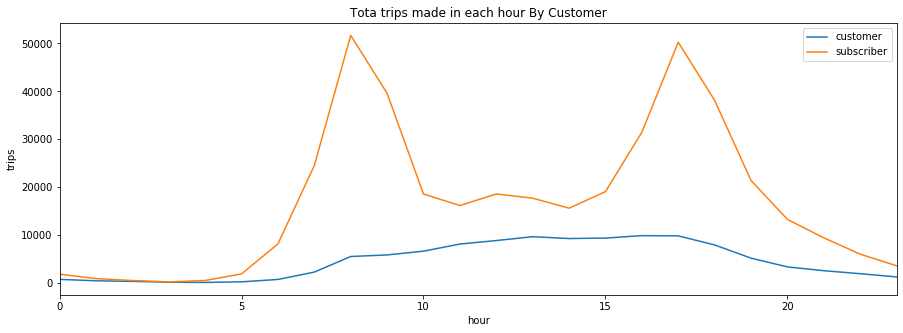

In [19]:
# activity per hour per user type
group_by_day_cust = customer.groupby('start_hour').count()
group_by_day_sub = subscriber.groupby('start_hour').count()


group_by_day_cust['bike_id'].plot(kind='line' , figsize = (15,5))
group_by_day_sub['bike_id'].plot(kind='line', figsize = (15,5) )

plt.xlabel('hour')
plt.ylabel('trips')
plt.legend(('customer' , 'subscriber'))
plt.title('Tota trips made in each hour By Customer')
plt.show()